<center><font size="10"> 🌳🌲Decision Trees🌲🌳  </font></center>

#### Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd    
from sklearn.datasets import load_iris

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
iris = load_iris()
X = iris['data'][:,2:]
y = iris['target']

In [23]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

#### To visualize the above tree

In [24]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [19]:
export_graphviz(
                tree_clf,
                out_file = "iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True,
                )

![image info](./iris_tree.jpg)

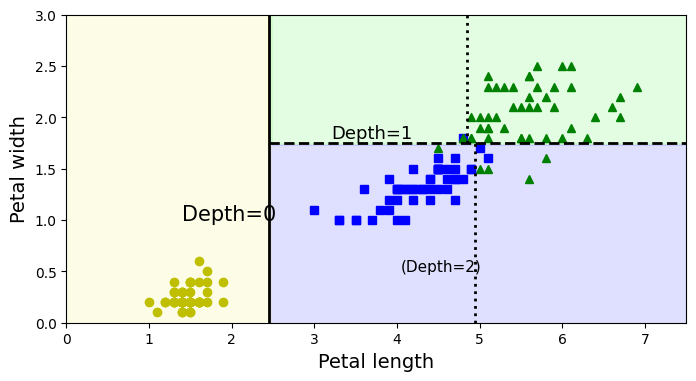

In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


plt.show()

#### depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0.
#### Since the left area is pure (only Iris-Setosa), it cannot be split any further. However, the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line)


In [27]:
tree_clf.predict([[5,1.5]])

array([1])

In [28]:
tree_clf.predict_proba([[5,1.5]])


array([[0.        , 0.90740741, 0.09259259]])

#### Decision Tree  output the following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris-Virginica (5/54).

## Regression using Decision Tree

#### Lets create a dummy quadratic data 

In [37]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
tree_reg = DecisionTreeRegressor(random_state=42 ,max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Text(0.5, 1.0, 'max_depth=2')

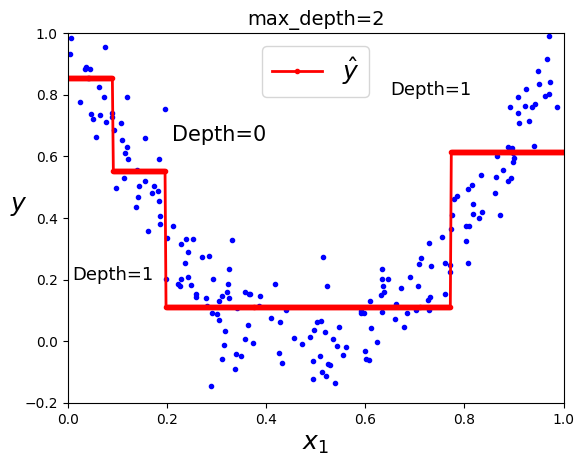

In [43]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")


plot_regression_predictions(tree_reg, X, y)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

In [45]:
tree_reg = DecisionTreeRegressor(random_state=42 ,max_depth=3)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=42)

Text(0.5, 1.0, 'max_depth=3')

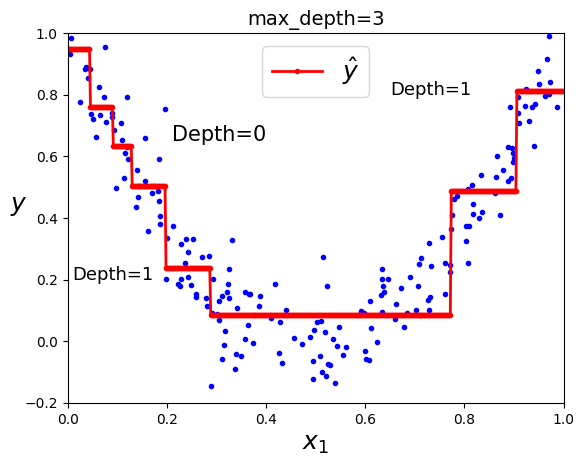

In [48]:
plot_regression_predictions(tree_reg, X, y)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=3", fontsize=14)

Text(0.5, 1.0, 'Default Params')

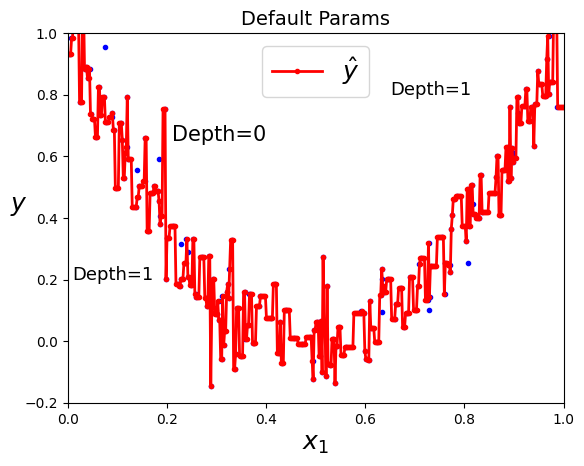

In [50]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X,y)
plot_regression_predictions(tree_reg, X, y)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("Default Params", fontsize=14)

Text(0.5, 1.0, 'Min Sample Leaf = 10')

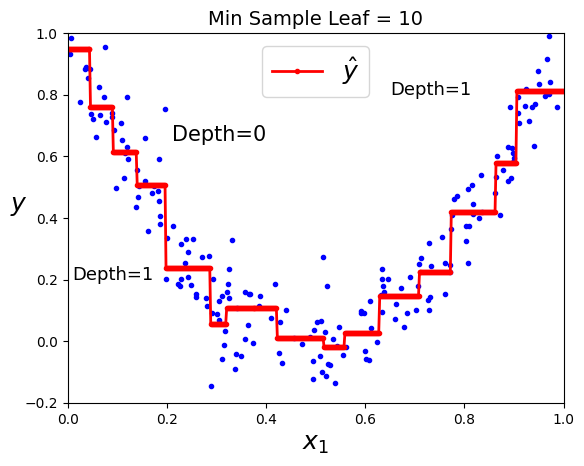

In [53]:
tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg.fit(X,y)
plot_regression_predictions(tree_reg, X, y)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("Min Sample Leaf = 10", fontsize=14)